In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/triples_bycollimator_by_angle.root")
f.ls()

TFile**		./data/triples_bycollimator_by_angle.root	
 TFile*		./data/triples_bycollimator_by_angle.root	
  KEY: TH2D	calo_1_tripleHit_1_6_20_70;1	Calo 1 Triple Hit 1 
  KEY: TH2D	calo_2_tripleHit_1_6_20_70;1	Calo 2 Triple Hit 1 
  KEY: TH2D	calo_3_tripleHit_1_6_20_70;1	Calo 3 Triple Hit 1 
  KEY: TH2D	calo_4_tripleHit_1_6_20_70;1	Calo 4 Triple Hit 1 
  KEY: TH2D	calo_5_tripleHit_1_6_20_70;1	Calo 5 Triple Hit 1 
  KEY: TH2D	calo_6_tripleHit_1_6_20_70;1	Calo 6 Triple Hit 1 
  KEY: TH2D	calo_7_tripleHit_1_6_20_70;1	Calo 7 Triple Hit 1 
  KEY: TH2D	calo_8_tripleHit_1_6_20_70;1	Calo 8 Triple Hit 1 
  KEY: TH2D	calo_9_tripleHit_1_6_20_70;1	Calo 9 Triple Hit 1 
  KEY: TH2D	calo_10_tripleHit_1_6_20_70;1	Calo 10 Triple Hit 1 
  KEY: TH2D	calo_11_tripleHit_1_6_20_70;1	Calo 11 Triple Hit 1 
  KEY: TH2D	calo_12_tripleHit_1_6_20_70;1	Calo 12 Triple Hit 1 
  KEY: TH2D	calo_13_tripleHit_1_6_20_70;1	Calo 13 Triple Hit 1 
  KEY: TH2D	calo_14_tripleHit_1_6_20_70;1	Calo 14 Triple Hit 1 
  KEY: TH2D	calo_1

In [3]:
keys = list(set([str(x).split("tripleHit_")[1].split('")')[0] if "_tri" in str(x) else "" for x in f.GetListOfKeys() ]))
keys.sort()
keys = keys[1:]
print(keys)

triples, colls, angle1s, angle2s = zip(*[x.split("_") for x in keys])
angles = list(set(zip(angle1s,angle2s)))
triples = list(set(triples))
colls = list(set(colls))
print(angles, triples, colls)

['1_6_110_160', '1_6_200_250', '1_6_20_70', '1_6_290_340', '1_8_110_160', '1_8_200_250', '1_8_20_70', '1_8_290_340', '2_6_110_160', '2_6_200_250', '2_6_20_70', '2_6_290_340', '2_8_110_160', '2_8_200_250', '2_8_20_70', '2_8_290_340', '3_6_110_160', '3_6_200_250', '3_6_20_70', '3_6_290_340', '3_8_110_160', '3_8_200_250', '3_8_20_70', '3_8_290_340']
[('20', '70'), ('200', '250'), ('110', '160'), ('290', '340')] ['2', '3', '1'] ['6', '8']


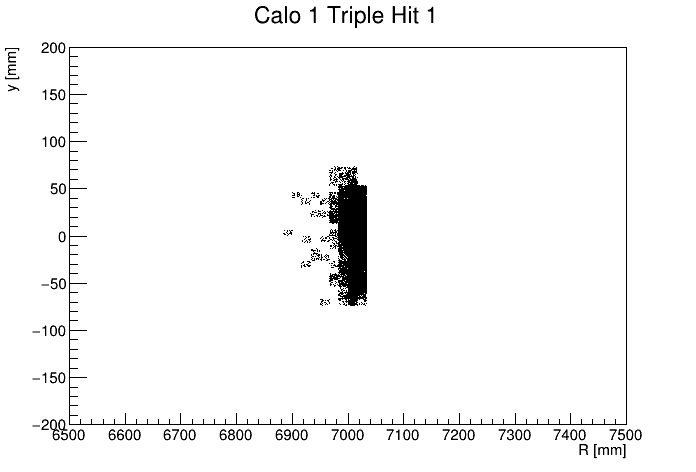

In [4]:
c = r.TCanvas()
f.Get("calo_1_tripleHit_1_6_20_70").Draw("")
c.Draw()

1_6_20_70
0.0590360456523524
2_6_20_70
0.03419821003366449
3_6_20_70
0.03542983824616144
1_6_200_250
0.014209983802091009
2_6_200_250
0.016124282138124002
3_6_200_250
0.01612428213812402
1_6_110_160
0.04457958026610581
2_6_110_160
0.022998491152667912
3_6_110_160
0.023775776141923062
1_6_290_340
0.016712795401319994
2_6_290_340
0.015648286140089427
3_6_290_340
0.01607408984458168
1_8_20_70
0.028982848757222783
2_8_20_70
0.04942064875110823
3_8_20_70
0.047204133418936624
1_8_200_250
0.016249533059394836
2_8_200_250
0.012140455734030626
3_8_200_250
0.012140455734030617
1_8_110_160
0.028068080023887734
2_8_110_160
0.04430178162635611
3_8_110_160
0.042291231213297475
1_8_290_340
0.00989282769991756
2_8_290_340
0.010923330585325639
3_8_290_340
0.01133553173948887


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


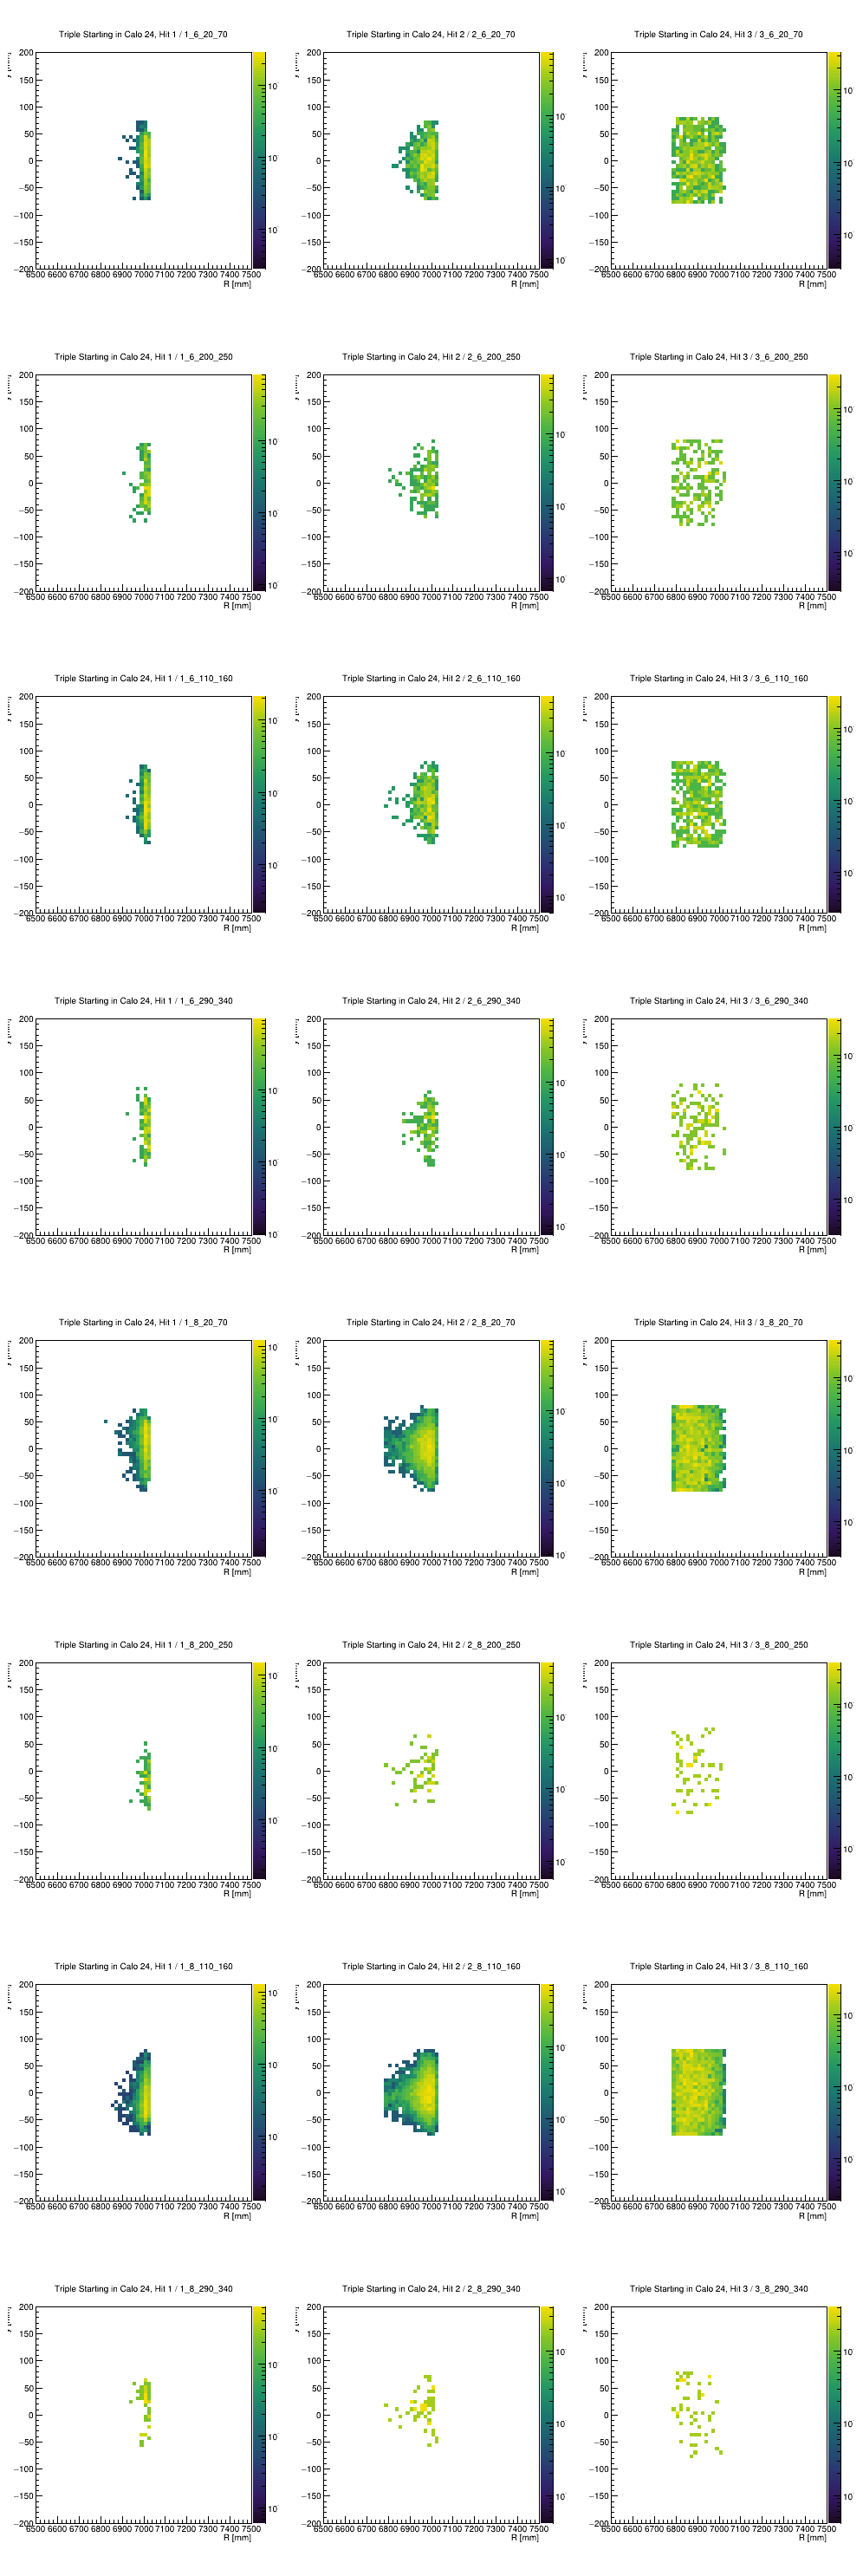

In [15]:
c = r.TCanvas("c","c",1000,3000)
c.Divide(3, int(len(keys)/3))
calo = 24
i = 1
j = 0
means_triple = [[] for i in range((int(len(keys)/3)+1))]
names = []

for collimator in colls:
    for angle1, angle2 in angles:
        for triple in range(1,4):

            key = str(triple)+"_"+str(collimator)+"_"+str(angle1)+"_"+str(angle2)
            print(key)
            c.cd(i)

            hi = f.Get("calo_"+str((calo+triple) % 24)+"_tripleHit_"+key).Clone()
            print(hi.Integral())
            hi.SetTitle("Triple Starting in Calo "+str(calo)+", Hit "+str(triple)+" / "+key)
            #hi.GetXaxis().SetRangeUser(6700,7100)
            #hi.GetYaxis().SetRangeUser(-85,85)
            means_triple[j].append((hi.GetMean(1), hi.GetMean(11), hi.GetMean(2), hi.GetMean(12)))
            hi.DrawCopy("colz")
            r.gPad.SetLogz()
            i += 1
        j += 1
        names.append( "col_"+str(collimator)+"_"+str(angle1)+"_"+str(angle2) )
c.Draw()

In [16]:
print(names)

['col_6_20_70', 'col_6_200_250', 'col_6_110_160', 'col_6_290_340', 'col_8_20_70', 'col_8_200_250', 'col_8_110_160', 'col_8_290_340']


[[(7009.915406165261, 0.3226854706415242, 1.2940564664062604, 0.7876251880738996), (6975.459345690101, 1.1793630600492453, -1.9440100404019116, 1.0666617723122935), (6901.637783470745, 2.0225163442832823, -3.5638347078343533, 1.4724647792191552)], [(7008.715014100502, 1.2200864232853947, -2.2311754680475113, 2.5080074263892578), (6972.443484278509, 2.913972326577494, 0.8013022596433282, 2.0237821963492166), (6899.288681806148, 4.461413755019302, 2.6239831644752525, 2.934987876749428)], [(7010.61916033395, 0.35173272312898707, -1.3756811403387632, 0.985208835076086), (6977.060497205842, 1.5921279250784126, 2.6581947046589427, 1.3500253467313768), (6905.6091583439575, 2.6144888328702507, 1.71387286305141, 1.9810889896939374)], [(7010.72553621459, 1.0649382315809814, -0.7041069538729965, 2.6940479064345033), (6977.690072158215, 2.899957838980024, 2.988097543112275, 2.387350165385229), (6898.883606278028, 4.846663514938808, 0.12802794042802015, 3.2475071822707835)], [(7003.950052894304, 0.

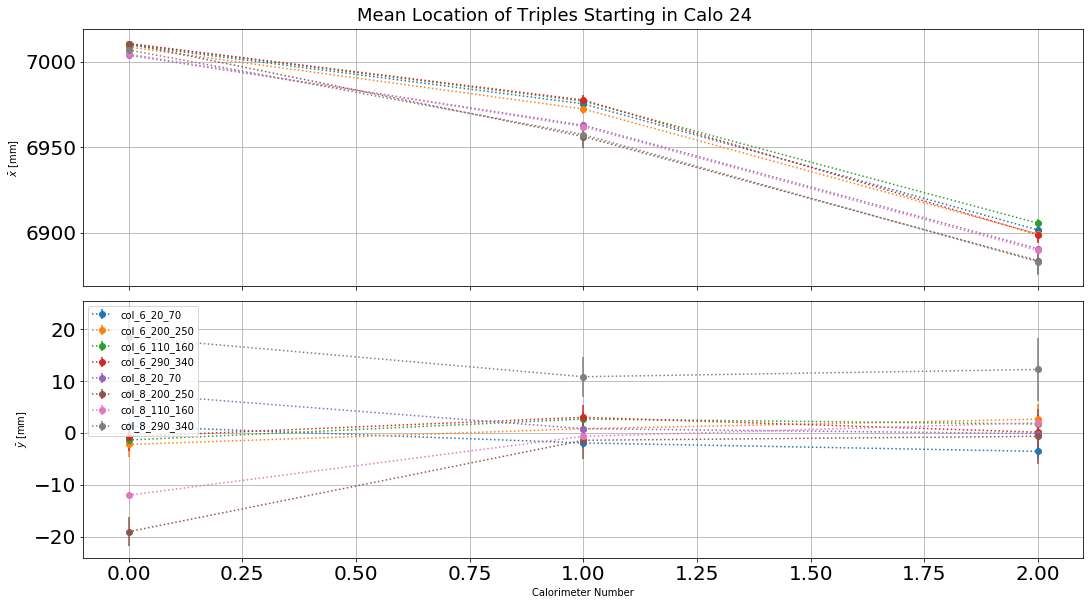

In [19]:
print(means_triple)

fig, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)
for i, meani in enumerate(means_triple):
    if(len(meani) < 1 or (meani[0][0] == 0)):
        continue
    xs, xerrs, ys, yerrs = zip(*meani)
    ax[0].errorbar([(iiii+calo) % 24 for iiii in range(len(xs))], xs, yerr=xerrs,label=names[i], fmt="o:")
    ax[1].errorbar([(iiii+calo) % 24 for iiii in range(len(ys))], ys, yerr=yerrs,label=names[i], fmt="o:")
plt.tight_layout()
plt.suptitle("Mean Location of Triples Starting in Calo "+str(calo)+"",y=1.02,fontsize=18)
plt.xlabel("Calorimeter Number")
for axi in ax:
    axi.grid()
ax[0].set_ylabel(r"$\bar{x}$ [mm]")
ax[1].set_ylabel(r"$\bar{y}$ [mm]")
plt.legend()
plt.show()

In [26]:
number_of_triples = [[] for i in range(int(len(keys)/3))]
i = 0
for collimator in colls:
    for angle1, angle2 in angles:
        for calo in range(1,25):

            key = str(1)+"_"+str(collimator)+"_"+str(angle1)+"_"+str(angle2)
            #print(key)

            hi = f.Get("calo_"+str(calo)+"_tripleHit_"+key).Clone()
            number_of_triples[i].append(hi.Integral())
        i+=1
#print(number_of_triples)

Integrated number of triples/muon in col_6_20_70 	 2.704656e-01
Integrated number of triples/muon in col_6_200_250 	 2.737447e-01
Integrated number of triples/muon in col_6_110_160 	 2.717754e-01
Integrated number of triples/muon in col_6_290_340 	 2.963594e-01
Integrated number of triples/muon in col_8_20_70 	 2.814669e-01
Integrated number of triples/muon in col_8_200_250 	 2.383265e-01
Integrated number of triples/muon in col_8_110_160 	 2.678411e-01
Integrated number of triples/muon in col_8_290_340 	 2.052762e-01


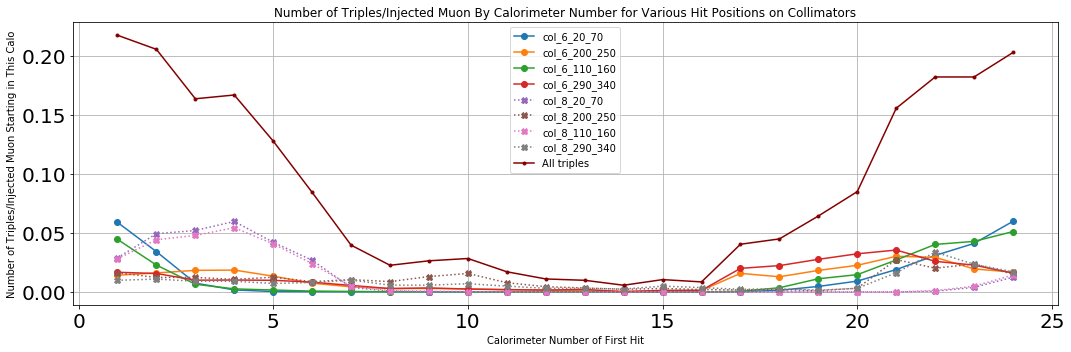

In [54]:
fig,ax = plt.subplots(figsize=(15,5))
for i, trii in enumerate(number_of_triples):
    tri = trii #+ trii
    #plt.xticklabels([(i+1) for i in range(len(tri))])
    if("col_8" in names[i]):
        plt.plot([x+1 for x in range(len(tri))],tri,".:", label=names[i],marker="X")
    else:
        plt.plot([x+1 for x in range(len(tri))],tri,".-", label=names[i],marker="o")
    print("Integrated number of triples/muon in", names[i],"\t", "{:e}".format(np.sum(tri)))
if(True):
    alltrips = [np.sum(x) for x in zip(*number_of_triples)]
    plt.plot([x+1 for x in range(len(tri))],alltrips,".-", label="All triples",color="xkcd:dark red")
plt.title("Number of Triples/Injected Muon By Calorimeter Number for Various Hit Positions on Collimators")
plt.xlabel("Calorimeter Number of First Hit")
plt.ylabel("Number of Triples/Injected Muon Starting in This Calo")
plt.grid()
plt.legend()
#plt.yscale("log")
plt.tight_layout()
plt.show()

(array([1., 0., 0., 1., 0., 0., 1., 3., 1., 1.]),
 array([0.20527617, 0.2143845 , 0.22349282, 0.23260114, 0.24170946,
        0.25081778, 0.2599261 , 0.26903442, 0.27814274, 0.28725106,
        0.29635938]),
 <a list of 10 Patch objects>)

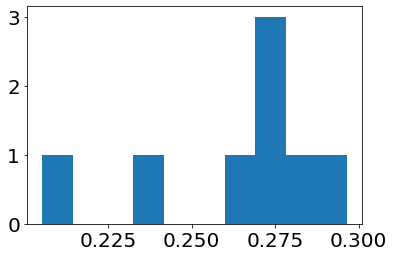

In [60]:
plt.hist([np.sum(x) for x in number_of_triples])

Integrated number of triples/muon in col_6_200_250 	 5.474893e-01
Integrated number of triples/muon in col_6_290_340 	 5.927188e-01
Integrated number of triples/muon in col_8_200_250 	 4.766530e-01
Integrated number of triples/muon in col_8_290_340 	 4.105523e-01


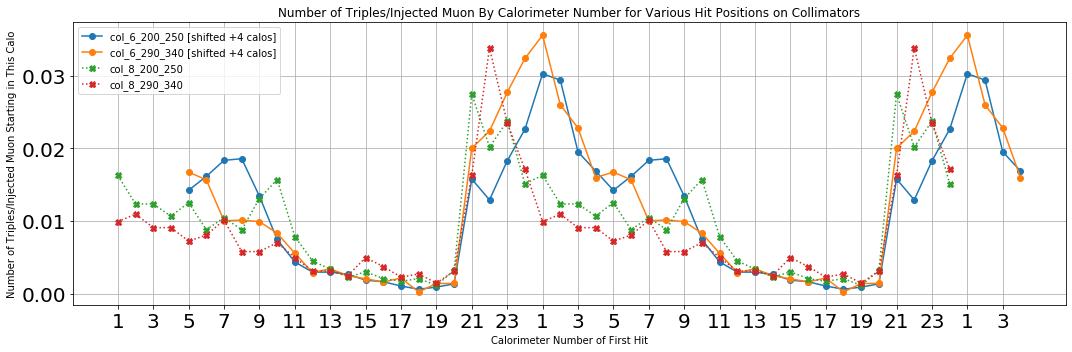

In [53]:
fig,ax = plt.subplots(figsize=(15,5))
nshift = 4
for i, trii in enumerate(number_of_triples):
    if(not("200" in names[i] or "290" in names[i])):
        continue
    tri = trii + trii
    #plt.xticklabels([(i+1) for i in range(len(tri))])
    if("col_8" in names[i]):
        plt.plot([x+1 for x in range(len(tri))],tri,".:", label=names[i],marker="X")
    else:
        plt.plot([x+nshift+1 for x in range(len(tri))],tri,".-", label=names[i]+" [shifted +"+str(nshift)+" calos]",marker="o")
    print("Integrated number of triples/muon in", names[i],"\t", "{:e}".format(np.sum(tri)))
if(False):
    alltrips = [np.sum(x) for x in zip(*number_of_triples)]
    plt.plot([x+1 for x in range(len(tri))],alltrips,".-", label="All triples",color="xkcd:dark red")
plt.title("Number of Triples/Injected Muon By Calorimeter Number for Various Hit Positions on Collimators")
plt.xlabel("Calorimeter Number of First Hit")
plt.ylabel("Number of Triples/Injected Muon Starting in This Calo")
plt.grid()
plt.legend()
#plt.yscale("log")
plt.tight_layout()
plt.xticks([i+1 for i in range(0, len(tri)+nshift, 2)], labels=[(i+1)%24 for i in range(0, len(tri)+nshift, 2)])
plt.show()

---

### now lets compare the mean x/y values for the triples

In [59]:
hit = 1

vec = []
for hit in range(1,4):
    for collimator in colls:
        for angle1, angle2 in angles:
            for calo in range(1,25):

                key = str(hit)+"_"+str(collimator)+"_"+str(angle1)+"_"+str(angle2)
                #print(key)

                hi = f.Get("calo_"+str(calo)+"_tripleHit_"+key).Clone()


                vec.append([hit, collimator, angle1, angle2, calo, hi.GetMean(1), hi.GetMean(11), hi.GetMean(2), hi.GetMean(12),
                           hi.Integral()])

df = pandas.DataFrame(vec, columns=['hit', 'collimator', 'a1', 'a2', 'calo','meanx', 'meanx_err', 'meany', 'meany_err',
                                   'integral'])
df.head()

,hit,collimator,a1,a2,calo,meanx,meanx_err,meany,meany_err,integral
0,1,6,20,70,1,7009.915406,0.322685,1.294056,0.787625,0.059036
1,1,6,20,70,2,7009.964545,0.382558,0.131397,1.026950,0.034198
2,1,6,20,70,3,7008.817060,0.757351,2.815376,2.243124,0.007513
3,1,6,20,70,4,7008.504922,3.839680,-7.428408,5.284401,0.001724
4,1,6,20,70,5,7011.965669,1.666839,-5.374262,9.587067,0.000369


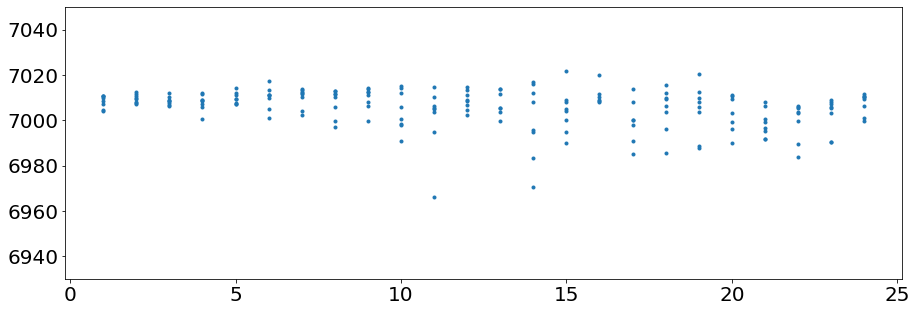

In [66]:
hit = 1
dfi = df.loc[df['hit'] == hit]

fig,ax = plt.subplots(figsize=(15,5))
plt.plot(dfi['calo'], dfi['meanx'],".")
plt.ylim(6930,7050)
plt.show()